# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [67]:
import pandas as pd

In [68]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [69]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [70]:
y = dados['inadimplente']
x = dados.drop('inadimplente', axis=1)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
modelo = DecisionTreeClassifier()

In [73]:
modelo.fit(x,y)

DecisionTreeClassifier()

In [74]:
modelo.score(x,y)

1.0

In [75]:
print(f"Acurácia: {modelo.score(x,y)}")

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x, x_test, y, y_test = train_test_split(x,y,test_size=0.15, stratify=y,
                                        random_state=5)

In [78]:
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                    stratify=y, random_state=5)

In [79]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [80]:
print(f"Acurácia de treino: {modelo.score(x_train, y_train)}")
print(f"Acurácia de validação: {modelo.score(x_val, y_val)}")

Acurácia de treino: 0.9206155632984901
Acurácia de validação: 0.9055831373573731


### Avaliando o modelo

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)

print(matriz_confusao)

[[10354   125]
 [  959    43]]


In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

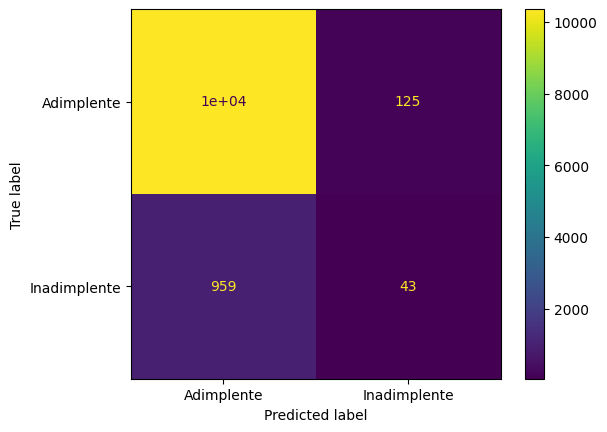

In [84]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels=['Adimplente','Inadimplente'])

visualizacao.plot();

## Desafio

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_train, y_train)
print(f'Acurácia de treino: {modelo.score(x_train, y_train)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9155052264808362
Acurácia de validação: 0.9128124727811167


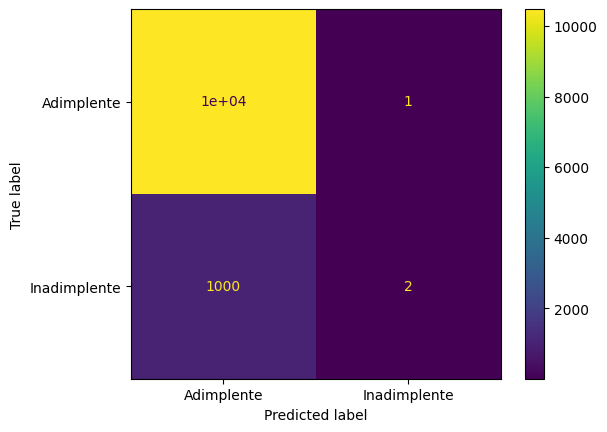

In [87]:
y_previsto_desafio = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto_desafio)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
print(f"Acurácia: {accuracy_score(y_val,y_previsto)}")

Acurácia: 0.9055831373573731


In [90]:
from sklearn.metrics import precision_score, recall_score
# Essas métricas precisam estar mais próximo de 1 para que
# Sejam consideradas boas

In [91]:
print(f"Precisão: {precision_score(y_val,y_previsto)}")
# O recall é mais prejudicial à empresa
print(f"Recall: {recall_score(y_val,y_previsto)}")

Precisão: 0.25595238095238093
Recall: 0.04291417165668663


In [92]:
from sklearn.metrics import f1_score

In [93]:
print(f"F1-Score: {f1_score(y_val, y_previsto)}")

F1-Score: 0.0735042735042735


### Curva ROC

In [94]:
from sklearn.metrics import RocCurveDisplay

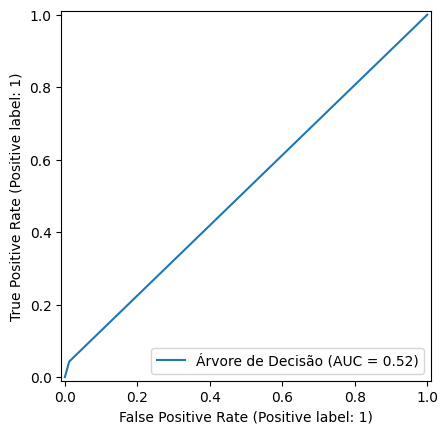

In [95]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
print(f"AUC: {roc_auc_score(y_val, y_previsto)}")

AUC: 0.5154927762568193


### Curva de precisão x recall

In [98]:
from sklearn.metrics import PrecisionRecallDisplay

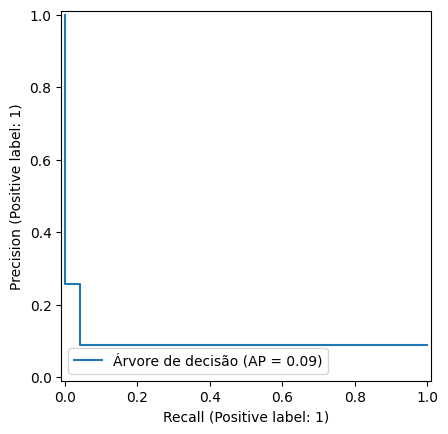

In [99]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de decisão');

In [100]:
from sklearn.metrics import average_precision_score

In [101]:
print(f"AP: {average_precision_score(y_val, y_previsto)}")
# Quanto mais próximo de zero, pior o modelo
# Quanto mais próximo de um, melhor o modelo

AP: 0.09451329370574367


### Relatório de métricas

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o **resultado seja muito dependente dessa divisão dos dados** e pode ser que, de forma aleatória, o **padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento**, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a **avaliação de desempenho será feita tirando a média da métrica de cada modelo**. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

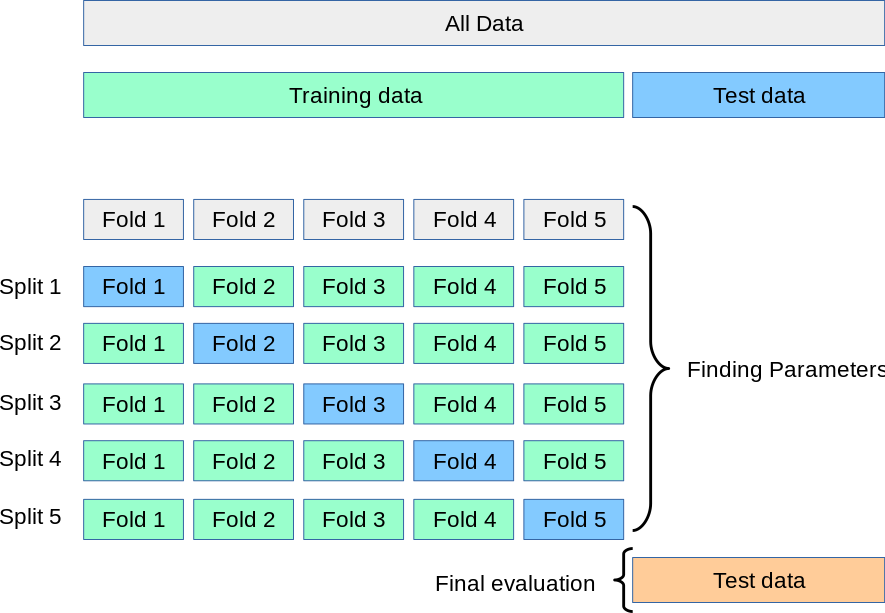

In [104]:
from sklearn.model_selection import cross_validate, KFold

In [105]:
modelo = DecisionTreeClassifier(max_depth=10)
# Shuffle: True -> Realiza o embaralhamento antes de haver a separação
kf = KFold(n_splits = 5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=kf)
cv_resultados

{'fit_time': array([0.24244046, 0.22706246, 0.22134638, 0.22474337, 0.23648453]),
 'score_time': array([0.00345612, 0.00351453, 0.00338769, 0.00394487, 0.00402117]),
 'test_score': array([0.9127926 , 0.90712108, 0.90766551, 0.91321864, 0.89917247])}

In [106]:
cv_resultados['test_score']

array([0.9127926 , 0.90712108, 0.90766551, 0.91321864, 0.89917247])

In [107]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()

# Intervalo de confiança pa acurácia
print(f"Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao,1)}]")

Intervalo de confiança: [0.8978348221974995, 0.9181532965918459]


### Validação cruzada com recall

In [108]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [109]:
modelo = DecisionTreeClassifier(max_depth=10)
# Shuffle: True -> Realiza o embaralhamento antes de haver a separação
kf = KFold(n_splits = 5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.22538042, 0.2228663 , 0.22390103, 0.22768497, 0.23318911]),
 'score_time': array([0.00621653, 0.00573754, 0.0057137 , 0.00576687, 0.00599432]),
 'test_score': array([0.02377807, 0.01856436, 0.0196802 , 0.01697128, 0.02427746])}

In [110]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.014873850437362904, 0.026434693799674128]


### Validação cruzada com Acurácia, Recall, Precisão e F1-Score

In [111]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.22135878, 0.22549319, 0.22635317, 0.29175615, 0.30835557]),
 'score_time': array([0.01356101, 0.01278472, 0.01248503, 0.02033687, 0.01841879]),
 'test_accuracy': array([0.91322809, 0.90799216, 0.90755662, 0.91321864, 0.89906359]),
 'test_recall': array([0.02774108, 0.01732673, 0.01845018, 0.01305483, 0.02427746]),
 'test_precision': array([0.25609756, 0.21538462, 0.22727273, 0.19607843, 0.20192308]),
 'test_f1': array([0.05005959, 0.03207331, 0.03412969, 0.0244798 , 0.04334365])}

In [112]:
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [113]:
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.8978426778228747, 0.9185809620687071]
Intervalo de confiança(test_recall): [0.009744700849270895, 0.030595414083915955]
Intervalo de confiança(test_precision): [0.1766978823680787, 0.2620046824033527]
Intervalo de confiança(test_f1): [0.01893103474545989, 0.05470338742437715]


### Estratificando os dados

In [114]:
dados['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [115]:
from sklearn.model_selection import StratifiedKFold

In [116]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=5)

cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')

In [117]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01838122108437663, 0.036494697732812595]


## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x,y)

In [120]:
y_balanceado.value_counts(normalize=True)

,proportion
inadimplente,
0,0.5
1,0.5


In [121]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring='recall')

In [122]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7046574651924149, 0.7622265688138696]


### Pipeline para validação

In [123]:
from imblearn.pipeline import Pipeline as imbpipeline

In [124]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [125]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring='recall')

In [126]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.21325850461002913, 0.323535590053437]


O pipeline é utilizado para realizar a transformação nos dados em cada uma das divisões de forma independente, além disso a transformação de oversampling é realizada somente nos dados de treino, mantendo a proporção original dos dados reais no conjunto de validação.

### Undersampling

In [127]:
from imblearn.under_sampling import NearMiss

In [129]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring='recall')

In [130]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6194534805694373, 0.7010561068851472]


### Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



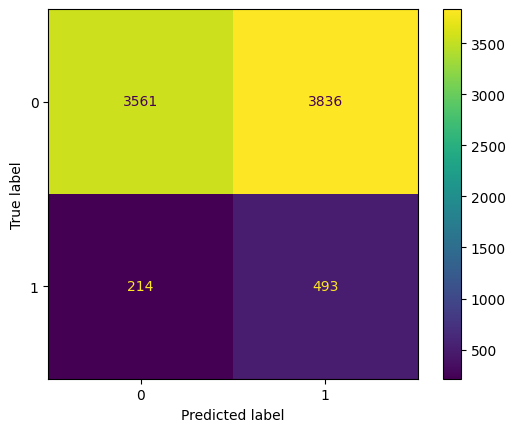

In [131]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit (x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto)

In [132]:
from imblearn.combine import SMOTEENN

In [133]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arvore', modelo)])

In [134]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.2738505097484648, 0.4236099589300262]
